To classify movie reviews as positive or negative, based on the text content of the reviews. using IMDB dataset 

In [34]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as py

##### Loading the IMDB dataset 

In [35]:
# (train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [37]:
train_data[0]
train_labels[0]

1

In [38]:
max([max(sequence) for sequence in train_data]) ### max word index

9999

In [39]:
word_index = imdb.get_word_index() ### word_index is a dictionary mapping words to an integer index.

In [17]:
# reverse_word_index = dict ([(value, key) for (key,value) in word_index.items()]) ### Reverses it,

In [14]:
# decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# decode_review

In [40]:
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3 
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}

In [41]:
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_data[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

####### the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices
####### for “padding,” “start of sequence,” and “unknown".

##### Encoding the integer sequences into a binary matrix 

In [42]:
def vactorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) ### Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. ### Sets specific indices of results[i] to 1s
    return results
    
x_train = vactorize_sequences(train_data) ### Vectorized training data
x_test = vactorize_sequences(test_data) ### Vectorized test data

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

##### Vectorize labels 

In [43]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

###### The model definition 

In [44]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##### Compiling the model 

In [45]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

###### configuring custom Optimizer, Loss and metric function

In [46]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])  

###### setting up validation set       

####### create validation set of 10000 sample from training dataset

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

###### train the model 

In [48]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 774us/step - loss: 0.4977 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8721
Epoch 2/20
15000/15000 [==============================] - 9s 613us/step - loss: 0.2958 - acc: 0.9044 - val_loss: 0.2989 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 6s 397us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3086 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.1742 - acc: 0.9435 - val_loss: 0.2831 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 10s 657us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 8s 526us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3076 - val_acc: 0.8817
Epoch 7/20
15000/15000 [==============================] - 6s 404us/step - loss: 0.0969 - acc: 0.9709 - val_loss: 0.3147 

####### model.fit() returns a History object as member history, which is a dictionary containing
####### four entries: one per metric that was being monitored during training and during validation

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

###### Plotting the training and validation loss 

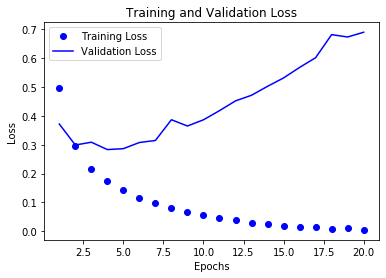

In [50]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)
py.plot(epochs, loss_values, 'bo', label='Training Loss')
py.plot(epochs, val_loss_values, 'b', label='Validation Loss')
py.title('Training and Validation Loss')
py.xlabel('Epochs')
py.ylabel('Loss')
py.legend()
py.show()

####### the training loss decreases with every epoch

###### Plotting the training and validation Accuracy 

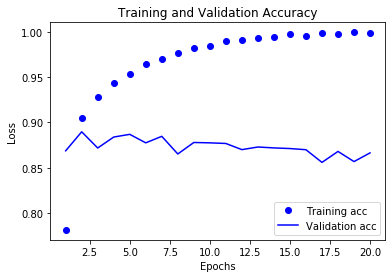

In [30]:
py.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
py.plot(epochs, acc_values, 'bo', label='Training acc')
py.plot(epochs, val_acc_values, 'b', label='Validation acc')
py.title('Training and Validation Accuracy')
py.xlabel('Epochs')
py.ylabel('Loss')
py.legend()
py.show()

######## the training accuracy increases with every epoch

###### Retraining the model 

In [51]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results ### with 4 epoch, accuracy of 97% is achieved

Epoch 1/4
25000/25000 [==============================] - 8s 304us/step - loss: 0.2205 - acc: 0.9464
Epoch 2/4
25000/25000 [==============================] - 5s 217us/step - loss: 0.1407 - acc: 0.9582
Epoch 3/4
25000/25000 [==============================] - 4s 180us/step - loss: 0.1121 - acc: 0.9671
Epoch 4/4
25000/25000 [==============================] - 12s 498us/step


[0.4990362632846832, 0.85756]

###### Using a trained network to generate predictions

In [52]:
model.predict(x_test) 

array([[0.02131359],
       [0.99999833],
       [0.99548644],
       ...,
       [0.20705605],
       [0.12549444],
       [0.73989785]], dtype=float32)